# <center>MEDICAL INSURANCE PREDICTION 
 

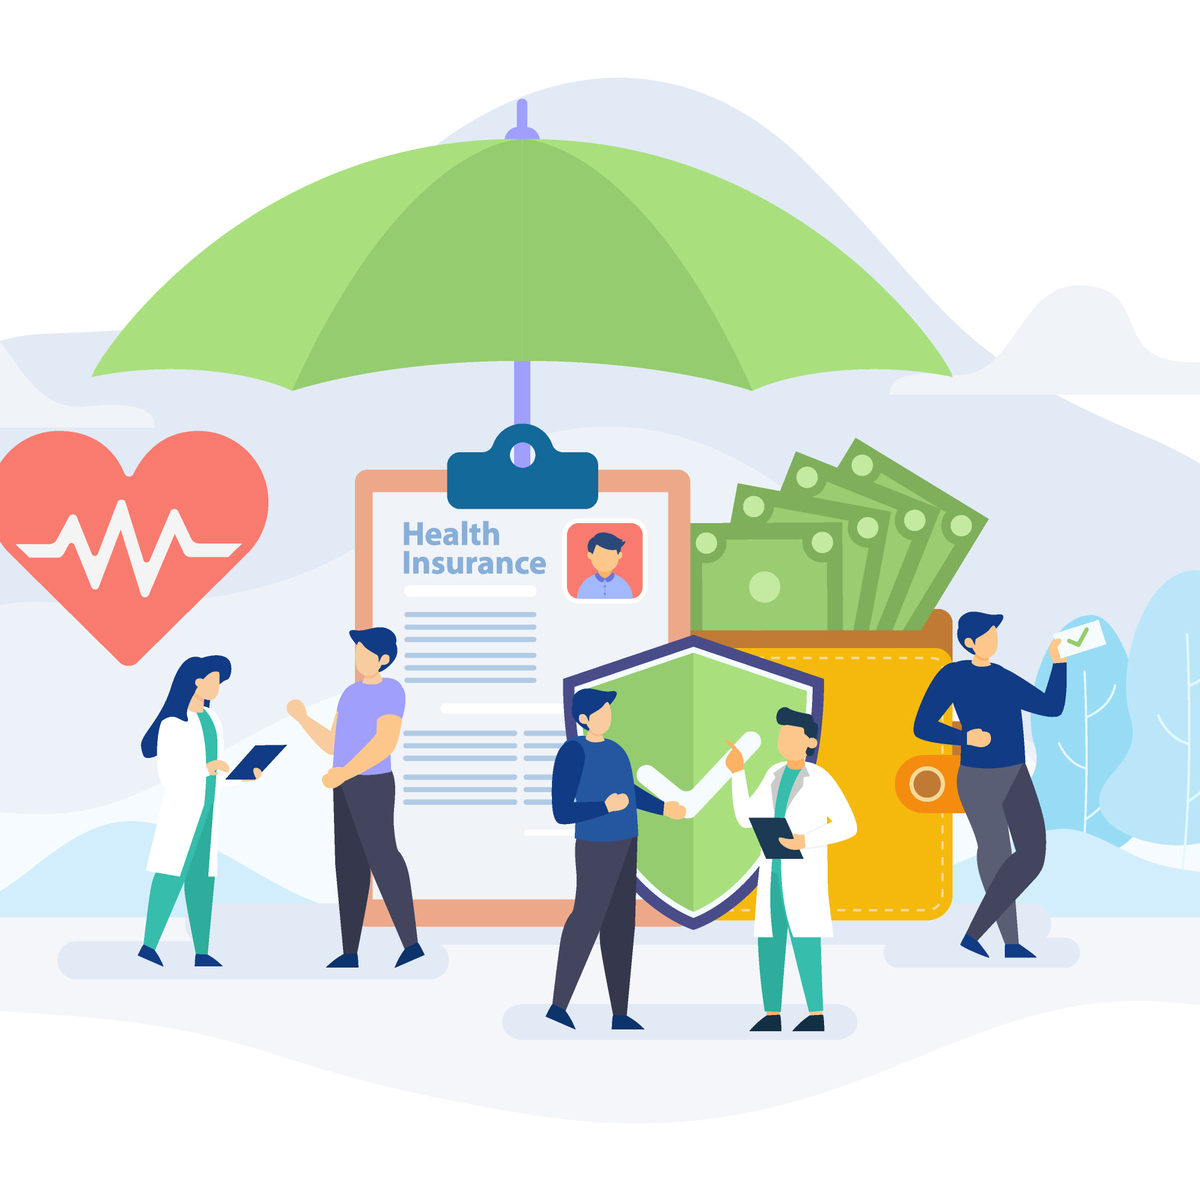

#### Table of contents<a name="TABLE"></a>
1. [OVERVIEW](#OVERVIEW)  
2. [IMPORT LIBRARIES AND DATASETS](#IMPORT) 
3. [EXPLORATORY DATA ANALYSIS](#EXPLORATORY) 
4. [DATASET VISUALIZATION](#VISUALIZATION)
    1. [QUICKSIGHT VISUALIZATION](#QUICKSIGHT) 
    2. [PYTHON'S SEABORN & MATPLOTLIB VISUALIZATION](#PYTHON)
5. [CREATE TRAINING AND TESTING DATASET](#TRAINING/TESTING) 
6. [TRAIN AND TEST MODEL IN SK-LEARN NOT USING SAGEMAKER](#SK-LEARN) 
    1. [Hyperparameter tuning on Multiple Models – Regression](#Hyperparameter)
    2. [Apply Gridsearchcv to find best parameter for the 2 best Model](#Gridsearchcv)
        1. [Model 1](#model1)
        2. [Model 2](#model2)
7. [APPLY PRINCIPAL COMPONENT ANALYSIS](#PCA)
    1. [DIMENSIONALITY REDUCTION USING PCA (SKLEARN)](#PCA-SKLEARN)
    2. [DIMENSIONALITY REDUCTION USING PCA ( USING SAGEMAKER)](#PCA-SAGEMAKER)
8. [TRAIN/TUNE/DEPLOY MODEL USING SAGEMAKER STUDIO](#using-sagemaker) 
9. [TRAIN MODEL USING DEEP LEARNING](#Deep-learning)
    1. [BUILDING ANN](#building_ann)
    2. [TRAINING ANN](#training_ann)
    3. [EVALUATING ANN](#evaluating_ann)
10. [SAGEMAKER AUTOPILOT](#Autopilot)
11. [CONCLUSION](#CONCLU) 

#### [Back to Top](#TABLE)  

## 1. OVERVIEW<a name="OVERVIEW"></a> 

### 1.1 About Dataset

#### The insurance dataset is from Kaggle (Data Source:https://www.kaggle.com/mirichoi0218/insurance). Aim of the problem is to find the health insurance cost incured by Individuals based on their age, gender, BMI, number of children, smoking habit and geo-location. In here we predict the dependent variable charges (cost of insurance) using the 5 independent features(sex, BMI, children, smoker, region). We use  AWS sagemaker, Machine Learning Algorithms, Deep Learning, XGBoost and AutoML to train and predict the individual insurance cost. In the  previous project we trained and tuned the algorithm indivually. In here we use the gridsearch to pick the best 2 Regression algorithm based on highest r2_score then tune the parameters of the best two algorithm to increase there performance.

### 1.2 Data Features:

1. age: range from 18-64 yrs old

2. sex: insurance contractor gender, female, male

3. bmi: Body mass index (ideally 18.5 to 24.9)

4. children: Number of children covered by health insurance / Number of dependents

5. smoker: smoking habits

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. charges: Individual medical costs billed by health insurance


#### [Back to Top](#TABLE)  

## 2. IMPORT LIBRARIES AND DATASETS <a name="IMPORT"></a> 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# read the csv file 
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#check rows and columns
insurance_df.shape

(1338, 7)

#### [Back to Top](#TABLE)  

## 3. EXPLORATORY DATA ANALYSIS: <a name="EXPLORATORY"></a> 

In [6]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#check duplicated rows
insurance_df[insurance_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
#Remove duplicate rows
insurance_df = insurance_df.drop_duplicates()


In [9]:
insurance_df.shape

(1337, 7)

In [10]:
# Check the dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [11]:
#check the statistic of the integers columns
insurance_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
#Check the unique values and counts of the categorical columns.
categorical_df = insurance_df.select_dtypes(include = 'object')
for i in categorical_df:
    column = categorical_df[i]
    print(i.upper())
    print("Number of Unique Values: ", column.nunique())
    print(column.value_counts())
    print('===============')

SEX
Number of Unique Values:  2
male      675
female    662
Name: sex, dtype: int64
SMOKER
Number of Unique Values:  2
no     1063
yes     274
Name: smoker, dtype: int64
REGION
Number of Unique Values:  4
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


In [13]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.259259,29.195494,1.151235,12450.840844
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [14]:
df_age = insurance_df.groupby(by='age').mean()
df_age.sort_values('charges', ascending=False)

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.567164,0.432836,9868.929428
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


In [15]:
#Can be use later in visualization
insurance_df_bare = insurance_df 
insurance_df_bare.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
# convert categorical variable to numerical
insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x == 'female' else 1)
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [17]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [18]:
#Add region_dummies to insurance_df
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)#1 means by columns or vertical, 0 means row or horizontal


In [19]:
# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)#inplace true means drop the region columns in memory


In [20]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [21]:
insurance_df_min = insurance_df[insurance_df['charges'] == insurance_df['charges'].min()]
insurance_df_min

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
940,18,1,23.21,0,0,1121.8739,0,1,0


In [22]:
insurance_df_max = insurance_df[insurance_df['charges'] == insurance_df['charges'].max()]
insurance_df_max

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
543,54,0,47.41,0,1,63770.42801,0,1,0


### [Back to Top](#TABLE)  

## 4. DATASET VISUALIZATION<a name="VISUALIZATION"></a>

### 4.1 QUICKSIGHT VISUALIZATION<a name="QUICKSIGHT"></a> 

 [Quicksight Dashboard (click to view)](https://us-east-1.quicksight.aws.amazon.com/sn/dashboards/e6a95b56-dab8-466d-86b9-a07876202384/views/86ce4561-147c-48d8-a322-bf3cac6cd8ee)

#### [Back to Top](#TABLE) 

### 4.2 PYTHON'S SEABORN & MATPLOTLIB VISUALIZATION<a name="PYTHON"></a>

In [23]:
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib import pyplot as plt
from scipy import stats

In [24]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

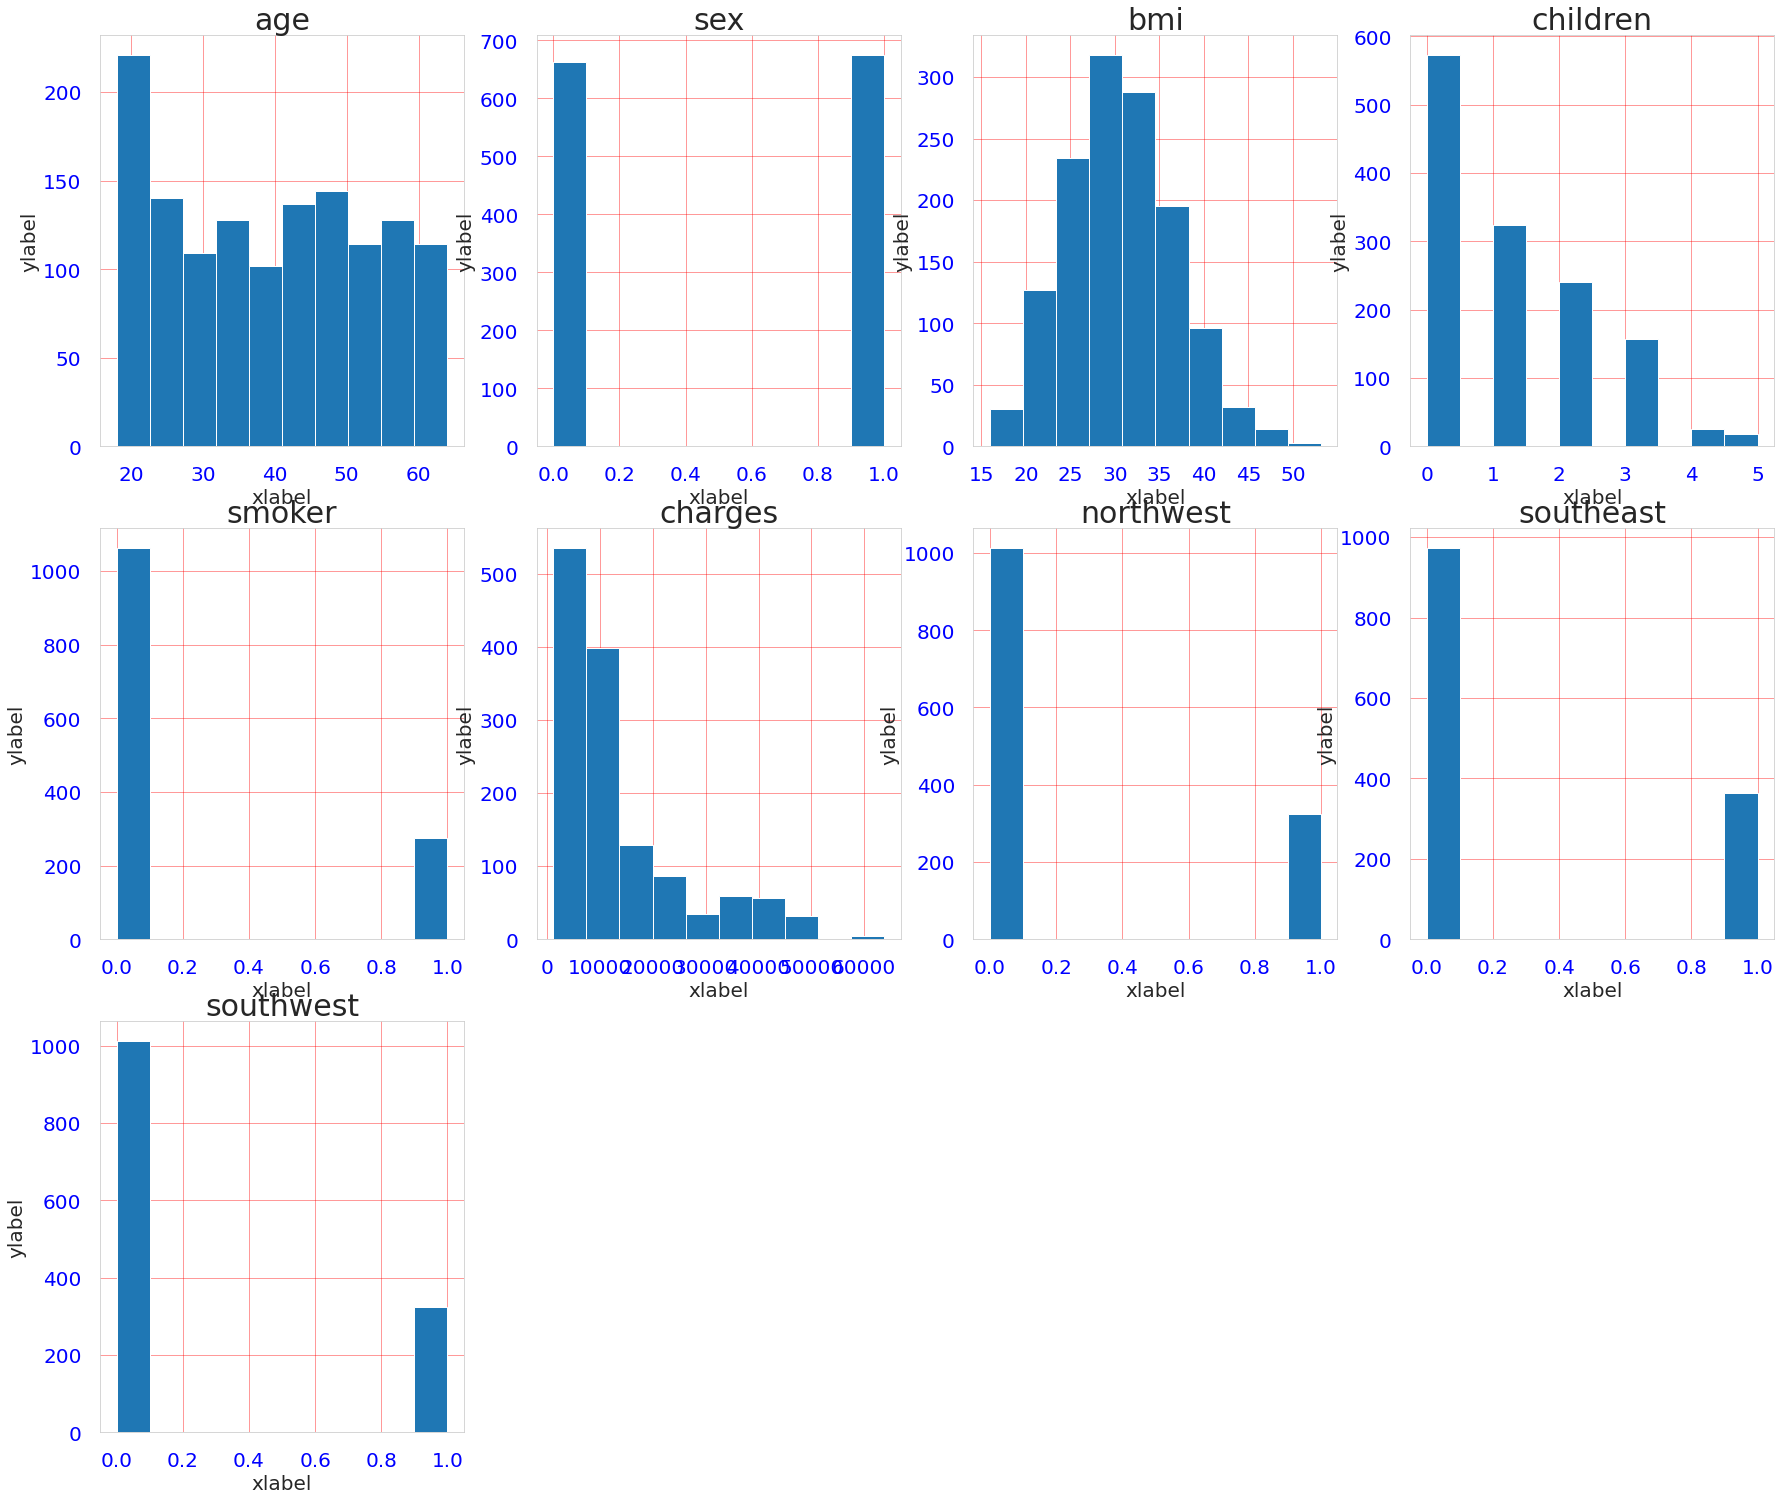

In [25]:
# Create a dictionary of columns.
dic_col = {'age':1, 'sex':2, 'bmi':3, 'children':4, 'smoker':5, 'charges':6, 'northwest':7,
       'southeast':8, 'southwest':9}

plt.figure(figsize=(30,30))

for variable,i in dic_col.items():
    plt.subplot(4,4,i)
    plt.hist(insurance_df[variable])
  
    plt.xlabel('xlabel', fontsize=20)
    plt.ylabel('ylabel', fontsize=20)
    plt.tick_params(direction='out', length=15, width=15, colors='r',
               grid_color='r', grid_alpha=0.5)
    plt.xticks(size = 20, color='blue' )
    plt.yticks(size = 20, color='blue')
    plt.title(variable, size = 30)
    plt.subplots_adjust(top=1)

#### Histogram determine the distribution of the data, In the graph above it shows only the BMI  is normally  distributed. The mean is 30. The other features are not normally distributed but it shows the balance and distributes count of each column.

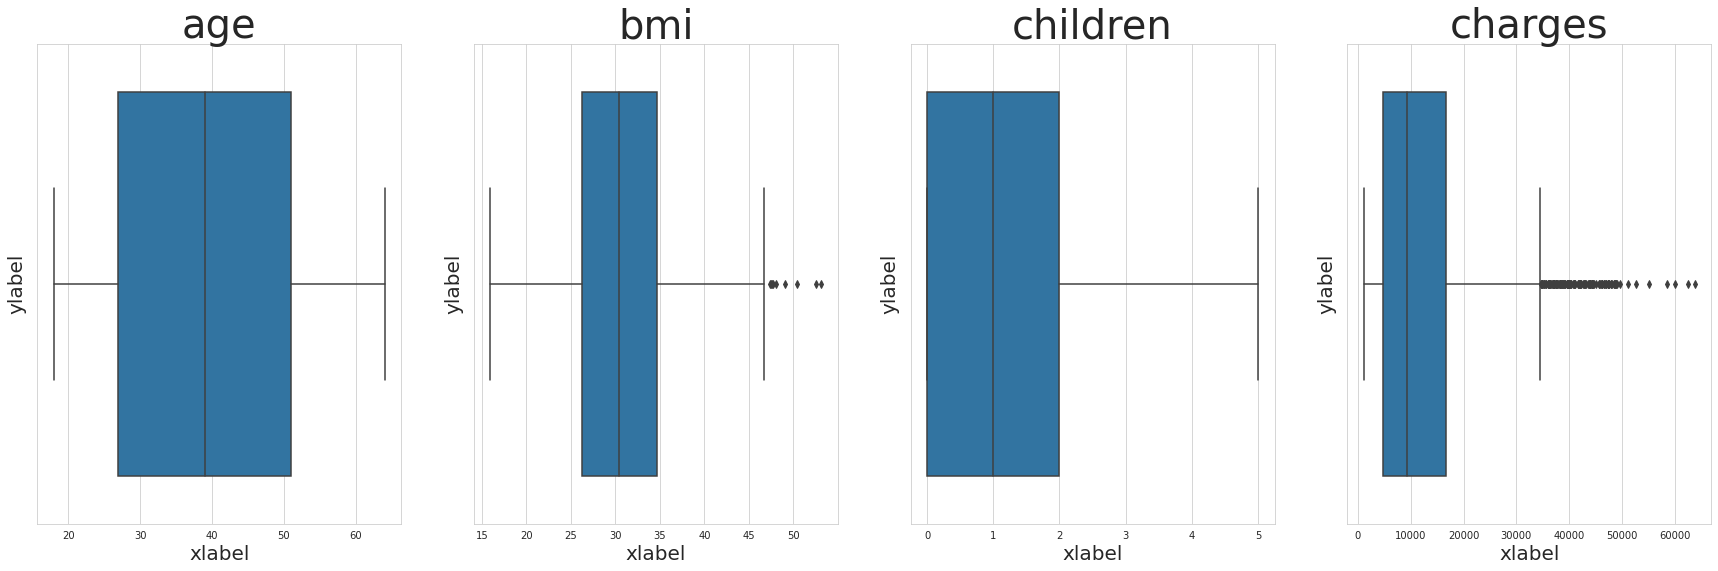

In [26]:
# Create a dictionary of columns.
dic_col = {'age':1, 'bmi':2, 'children':3, 'charges':4}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(30,30))

for variable,i in dic_col.items():
    plt.subplot(3,4,i)
    
    sns.boxplot(x=insurance_df[variable],data=insurance_df)#hue='classi',x='classi',
    plt.xlabel('xlabel', fontsize=20)
    plt.ylabel('ylabel', fontsize=20)
    plt.title(variable, size=40)

##### We can see above that the BMI and Charges has outliers. Let check the outliers below.

In [27]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


#### Let check how much the insurance difference between the BMI outlier(above 46) and the normal B(ideally 18.5 to 24.9).

In [28]:
BMI_outliers = insurance_df[insurance_df['bmi'] >= 46]
BMI_outliers.sort_values('charges', ascending=False).head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
543,54,0,47.41,0,1,63770.42801,0,1,0
860,37,0,47.60,2,1,46113.51100,0,0,1
549,43,0,46.20,0,1,45863.20500,0,1,0
1047,22,1,52.58,1,1,44501.39820,0,1,0
438,52,0,46.75,5,0,12592.53450,0,1,0


In [29]:
BMI_outliers.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0,16.000000,16.000000
mean,40.687500,0.562500,48.051250,1.375000,0.250000,18139.171182,0.0,0.812500,0.125000
std,13.077812,0.512348,2.182866,1.310216,0.447214,19754.342648,0.0,0.403113,0.341565
min,18.000000,0.000000,46.090000,0.000000,0.000000,1163.462700,0.0,0.000000,0.000000
25%,30.500000,0.000000,46.530000,0.750000,0.000000,5998.314950,0.0,1.000000,0.000000
50%,44.500000,1.000000,47.465000,1.000000,0.000000,9649.237850,0.0,1.000000,0.000000
75%,52.000000,1.000000,48.317500,2.000000,0.250000,20569.750425,0.0,1.000000,0.000000
max,58.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,0.0,1.000000,1.000000


##### We can see that there are 16 individual w/ above 46(outlier) BMI and the average insurance charge is 18139.17 with a max of 63,770.42.

In [30]:
# Normal bmi: Body mass index (ideally 18.5 to 24.9)
BMI_normal = insurance_df[(insurance_df['bmi'] >= 18.5) & (insurance_df['bmi'] <= 24.9)]
BMI_normal.sort_values('charges', ascending=False).head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
917,45,1,22.895,0,1,35069.37452,0,0,0
62,64,1,24.700,1,0,30166.61817,1,0,0
140,34,1,22.420,2,0,27375.90478,0,0,0
1142,52,0,24.860,0,0,27117.99378,0,1,0
664,64,0,22.990,0,1,27037.91410,0,1,0


In [31]:
BMI_normal.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,36.747748,0.477477,22.584189,1.117117,0.225225,10379.499732,0.279279,0.180180,0.216216
std,13.652751,0.500621,1.630495,1.242088,0.418675,7500.713471,0.449659,0.385206,0.412594
min,18.000000,0.000000,18.500000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,25.000000,0.000000,21.477500,0.000000,0.000000,4057.701137,0.000000,0.000000,0.000000
50%,35.000000,0.000000,22.895000,1.000000,0.000000,8604.153525,0.000000,0.000000,0.000000
75%,47.750000,1.000000,23.980000,2.000000,0.000000,15197.264325,1.000000,0.000000,0.000000
max,64.000000,1.000000,24.890000,5.000000,1.000000,35069.374520,1.000000,1.000000,1.000000


##### We can see that the average charge for people with a BMI above 46(outlier) is  18139.17 𝑤ith 𝑎 𝑚𝑎𝑥 𝑜𝑓 63,770.42 higher than those in normal BMI range(average= 10379.49 and max= 35065.37).

#### Let us check the outlier charges

In [32]:
insurance_df.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,13279.121487,0.242334,0.272251,0.243082
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656,0.428655,0.445285,0.429104
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9386.161300,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


In [33]:
charges_outliers = insurance_df[insurance_df['charges'] >= 35000]
charges_outliers.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,41.894737,0.631579,35.684474,1.233083,0.977444,42435.376422,0.150376,0.413534,0.233083
std,13.518373,0.484200,4.484903,1.127395,0.149046,5478.380230,0.358791,0.494329,0.424393
min,18.000000,0.000000,22.895000,0.000000,0.000000,35069.374520,0.000000,0.000000,0.000000
25%,31.000000,0.000000,32.775000,0.000000,1.000000,38344.566000,0.000000,0.000000,0.000000
50%,43.000000,1.000000,35.300000,1.000000,1.000000,41661.602000,0.000000,0.000000,0.000000
75%,53.000000,1.000000,37.800000,2.000000,1.000000,46113.511000,0.000000,1.000000,0.000000
max,64.000000,1.000000,52.580000,4.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


In [34]:
charges_outliers.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,41.894737,0.631579,35.684474,1.233083,0.977444,42435.376422,0.150376,0.413534,0.233083
std,13.518373,0.484200,4.484903,1.127395,0.149046,5478.380230,0.358791,0.494329,0.424393
min,18.000000,0.000000,22.895000,0.000000,0.000000,35069.374520,0.000000,0.000000,0.000000
25%,31.000000,0.000000,32.775000,0.000000,1.000000,38344.566000,0.000000,0.000000,0.000000
50%,43.000000,1.000000,35.300000,1.000000,1.000000,41661.602000,0.000000,0.000000,0.000000
75%,53.000000,1.000000,37.800000,2.000000,1.000000,46113.511000,0.000000,1.000000,0.000000
max,64.000000,1.000000,52.580000,4.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


##### We can see that there are 133 people with insurance charges is above $35,000. There average ages are 42,average BMI is 36 and are smokers.

In [35]:
corr_matrix = insurance_df.corr()
corr_matrix

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.298308,0.001495,-0.012311,0.009415
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.058044,-0.012482,0.017578,-0.003767
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.198401,-0.136138,0.270057,-0.006211
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.067389,0.026044,-0.023492,0.021538
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.787234,-0.036321,0.068282,-0.037168
charges,0.298308,0.058044,0.198401,0.067389,0.787234,1.000000,-0.038695,0.073578,-0.043637
northwest,0.001495,-0.012482,-0.136138,0.026044,-0.036321,-0.038695,1.000000,-0.345909,-0.320493
southeast,-0.012311,0.017578,0.270057,-0.023492,0.068282,0.073578,-0.345909,1.000000,-0.346614
southwest,0.009415,-0.003767,-0.006211,0.021538,-0.037168,-0.043637,-0.320493,-0.346614,1.000000


<AxesSubplot:>

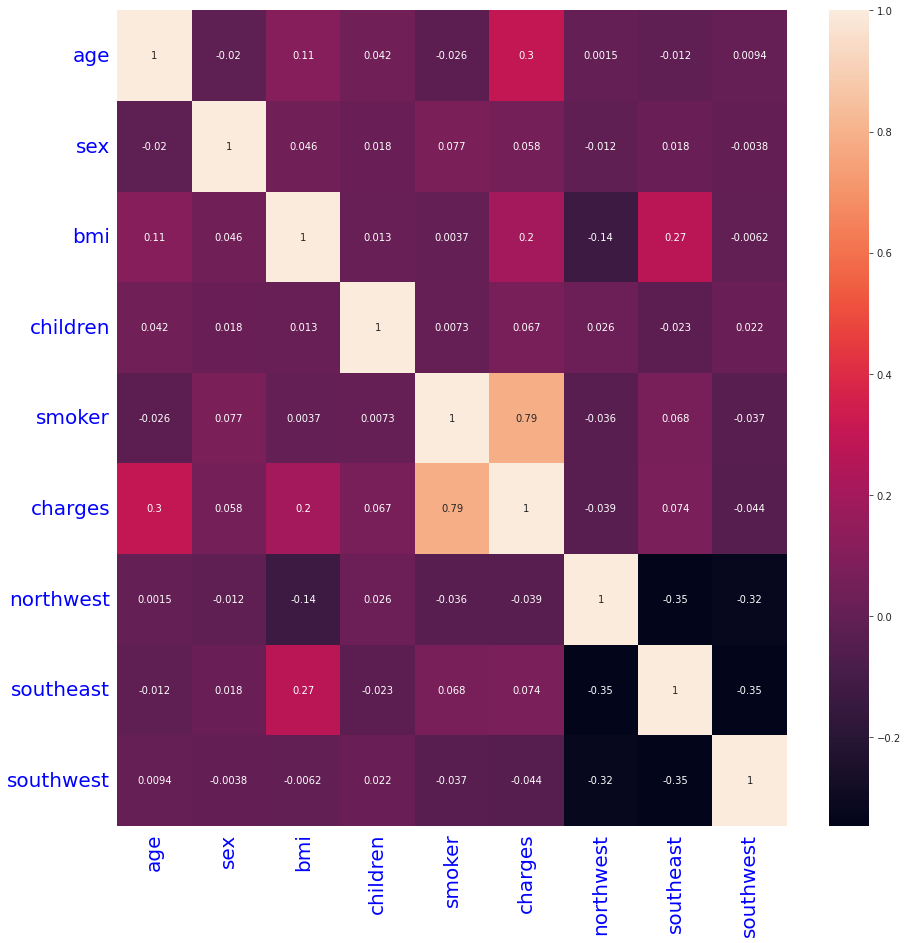

In [36]:
corr_matrix = insurance_df.corr()
plt.figure(figsize= (15,15))#make figure size bigger cause it overlapping
plt.xticks(size = 20, color='blue' )
plt.yticks(size = 20, color='blue')
sns.heatmap(corr_matrix, annot = True)

##### In this heat map we measure the correlation between features variables and target variables. 3 most predictive numeric features is Age, BMI and smoker, the 3 independent feature that is correlated to the dependent feature(Charges). We can see that there is no correlation between the independent features. Removing highly correlated features can reduce overfitting and training time. Correlation is in the range [-1, 1] where 0 implies no correlation, 1 implies perfect correlation, and -1 implies perfect inverse correlation.


#### [Back to Top](#TABLE)  

## 5. CREATE TRAINING AND TESTING DATASET<a name="TRAINING/TESTING"></a>

In [37]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [38]:
X = insurance_df.drop(columns =['charges'])#independent features
y = insurance_df['charges']#dependent features


In [39]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [40]:
#train_test_split also shuffle the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


### 5.1 Feature Scaling
    - Apply feature scaling after the split to avoid information leakage.

In [41]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train.reshape(-1,1))

#### [Back to Top](#TABLE)  

## 6. TRAIN AND TEST MODEL IN SK-LEARN NOT USING SAGEMAKER<a name="SK-LEARN"></a>

### 6.1 Hyperparameter tuning on Multiple Models – Regression<a name="Hyperparameter"></a>

In [42]:
# Import regression metrics
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score, mean_squared_error

In [43]:
#pip install xgboost

In [44]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [45]:
regressors = [
    KNeighborsRegressor(),
    #ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    SVR(),
    XGBRegressor(objective='reg:squarederror')
]

Now the reason of selecting scaling above which was different from Grid Search for one model is training time. Time for training all the models, this may take time depending on your machine configuration.

In [46]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train_sc, y_train_sc.ravel())
    train_time = time() - start
    start = time()
    y_pred = sc_y.inverse_transform((model.predict(sc_X.transform(X_test))).reshape(-1,1))
    #y_pred = model.predict(X_test)#use this if not scale
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance: %0.3f" % explained_variance_score(y_test, y_pred))
    print("\tMean absolute error: %0.3f" % mean_absolute_error(y_test, y_pred))
    #print("\tMean Square Error: %0.3f" % mean_squared_error(y_test, y_pred))
    print("\tR2 score: %0.3f" % r2_score(y_test, y_pred))
    print()


KNeighborsRegressor()
	Training time: 0.006s
	Prediction time: 0.014s
	Explained variance: 0.800
	Mean absolute error: 3695.263
	R2 score: 0.800

RandomForestRegressor()
	Training time: 0.694s
	Prediction time: 0.038s
	Explained variance: 0.839
	Mean absolute error: 2983.072
	R2 score: 0.838

DecisionTreeRegressor()
	Training time: 0.005s
	Prediction time: 0.001s
	Explained variance: 0.702
	Mean absolute error: 3531.909
	R2 score: 0.702

LinearRegression()
	Training time: 0.022s
	Prediction time: 0.001s
	Explained variance: 0.757
	Mean absolute error: 4396.031
	R2 score: 0.753

Lasso()
	Training time: 0.005s
	Prediction time: 0.001s
	Explained variance: -0.000
	Mean absolute error: 9907.923
	R2 score: -0.006

Ridge()
	Training time: 0.010s
	Prediction time: 0.000s
	Explained variance: 0.757
	Mean absolute error: 4397.842
	R2 score: 0.753

SVR()
	Training time: 0.056s
	Prediction time: 0.006s
	Explained variance: 0.845
	Mean absolute error: 2881.294
	R2 score: 0.840

XGBRegressor(base_s

#### After comparing the different regression models, the 3 best model are:
- ##### XG Boost: R_2 score 0.847 and MSE of 2815.38
- ##### SVR: R_2 score 0.840 and MSE of 2881.23
- ##### Random Forest regression: R_2 score 0.839 and MSE of 2965.755

##### R squared closer to 1 implies a better model and less error and the lower the value of MSE the better the model. We apply Gridsearch below to find the best parameter for each of the 3 model to see if we can improve the models.

#### [Back to Top](#TABLE)  

### 6.2 Apply Gridsearchcv for best parameter for the 3 best Model then Evaluate<a name="Gridsearchcv"></a>

#### 6.2.1 XGBOOST ALGORITHM<a name="model1"></a>

In [47]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' : [100, 400, 800],
              'learning_rate' : [0.05,0.1, 0.20,0.50],
              'max_depth' : [1,3,5,8]
             }

In [48]:
grid = GridSearchCV(XGBRegressor(objective='reg:squarederror'),parameters)
model = grid.fit(X_train_sc, y_train_sc.ravel())
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100} 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) 



In [49]:
from xgboost import XGBRegressor
xgbregressor = XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=100,
             objective='reg:squarederror') 
xgbregressor.fit(X_train_sc, y_train_sc.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [50]:
#transform scale to original and put it to datafram
y_pred_xgb = sc_y.inverse_transform((xgbregressor.predict(sc_X.transform(X_test))).reshape(-1,1))
df_val_xgb = pd.DataFrame({'Predicted Values': y_pred_xgb.ravel(), 'Real Values':  y_test.ravel()})
df_val_xgb

,Predicted Values,Real Values
0,3375.394043,1633.961792
1,10799.860352,8547.691406
2,11073.084961,9290.139648
3,34594.640625,32548.339844
4,10063.418945,9644.252930
...,...,...
263,6287.165039,3309.792480
264,7600.439453,6664.686035
265,5034.631348,2304.002197
266,24112.021484,25382.296875


#### We can see the difference between the predicted values and the real values. We evaluate below to check if the model is performing good.

### Evaluate Model Performance

In [51]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
r2 = r2_score(y_test,  y_pred_xgb).round(3)

print('r2_score:', r2)
print('rmse: {:.3f}'.format(float(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))))
print('explained_variance_score: {:.3f}'.format(explained_variance_score(y_test,  y_pred_xgb)))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test,  y_pred_xgb)))
print('adj_r2: {:.3f}'.format(1-(1-r2)*(n-1)/(n-k-1)))

r2_score: 0.851
rmse: 5006.263
explained_variance_score: 0.852
mean_absolute_error: 2824.000
adj_r2: 0.846


#### XGBoost Regression Model R-2 score is 85.10% means a good model. R squared closer to 1 implies a better model and less error. Mean Absolute Error (MSE) is 2824, the lower the value of MSE and RMSE the better the model.

### Applying k-Fold Cross Validation


In [52]:
from sklearn.model_selection import cross_val_score
r2_K_FOLD_xgb = cross_val_score(estimator = xgbregressor, X = X_train_sc, y = y_train_sc, cv = 5)
print("CROSS-VAL-R2: ",(r2_K_FOLD_xgb))
print("AVERAGE-R2-ERROR: {:.2f} %".format(r2_K_FOLD_xgb.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(r2_K_FOLD_xgb.std()*100))

CROSS-VAL-R2:  [0.90258878 0.79434871 0.85201315 0.86557023 0.87789057]
AVERAGE-R2-ERROR: 85.85 %
STANDARD DEVIATION: 3.61


####  Cross Validation randomly split the data into 5 approximately equal size and R_2 score in each set is calculated. We can see that XGBoost Regression Model perform good on each of the 5 divided dataset. The R2_score values are near each other, each R_2 score value is plus or minus 3.61 of the average R2_score of 85.85%. Model overfits the data when it will give high performance score on training data and low score on test set or unseen data. In XGBoost Regression Model, the value of R2_score 85.10%(whole data) and R2_score of 4 divided dataset are near each other. Only in the division 2 w/c is 79.43%. In the range of 81.49-88-93% w/c the model perform a little bit well, this helps us assess how well our model generalizes/perform on new datasets or unseen data.

### Unscaled

In [53]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' : [100, 400, 800],
              'learning_rate' : [0.05,0.1, 0.20,0.50],
              'max_depth' : [1,3,5,8]
             }

In [54]:
grid = GridSearchCV(XGBRegressor(objective='reg:squarederror'),parameters)
model = grid.fit(X_train, y_train)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100} 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) 



In [55]:
from xgboost import XGBRegressor
xgbregressor = XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=100,
             objective='reg:squarederror') 
xgbregressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [56]:
y_pred_xgb = xgbregressor.predict(X_test)
df_val_xgb = pd.DataFrame({'Predicted Values': y_pred_xgb.ravel(), 'Real Values':  y_test.ravel()})
df_val_xgb

,Predicted Values,Real Values
0,3274.729980,1633.961792
1,10704.077148,8547.691406
2,10928.764648,9290.139648
3,35134.386719,32548.339844
4,10065.467773,9644.252930
...,...,...
263,6209.122559,3309.792480
264,7465.362305,6664.686035
265,4976.530762,2304.002197
266,23818.867188,25382.296875


### Evaluating the Model Performance

In [57]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
r2 = r2_score(y_test,  y_pred_xgb).round(3)

print('r2_score:', r2)
print('rmse: {:.3f}'.format(float(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))))
print('explained_variance_score: {:.3f}'.format(explained_variance_score(y_test,  y_pred_xgb)))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test,  y_pred_xgb)))
print('adj_r2: {:.3f}'.format(1-(1-r2)*(n-1)/(n-k-1)))

r2_score: 0.85
rmse: 5024.715
explained_variance_score: 0.852
mean_absolute_error: 2764.432
adj_r2: 0.845


### Applying k-Fold Cross Validation


In [58]:
from sklearn.model_selection import cross_val_score
r2_K_FOLD_xgb = cross_val_score(estimator = xgbregressor, X = X_train_sc, y = y_train_sc, cv = 5)
print("CROSS-VAL-R2: ",(r2_K_FOLD_xgb))
print("AVERAGE-R2-ERROR: {:.2f} %".format(r2_K_FOLD_xgb.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(r2_K_FOLD_xgb.std()*100))

CROSS-VAL-R2:  [0.90258878 0.79434871 0.85201315 0.86557023 0.87789057]
AVERAGE-R2-ERROR: 85.85 %
STANDARD DEVIATION: 3.61


##### The result is almost the same w/ the unscaled data. In XGBoost model perform almost the same in scale and unscaled data.

#### [Back to Top](#TABLE)  

### 6.2.2 SVM ALGORITHM<a name="model2"></a>

In [49]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(SVR(), parameters)
grid_search.fit(X_train_sc, y_train_sc.ravel())
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
#print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [59]:
regressor = SVR(kernel = 'rbf', C= 1, gamma= 0.1)
regressor.fit(X_train_sc, y_train_sc.ravel())

SVR(C=1, gamma=0.1)

In [60]:
y_pred_svr = sc_y.inverse_transform((regressor.predict(sc_X.transform(X_test))).reshape(-1,1))
df_val_svr = pd.DataFrame({'Predicted Values': y_pred_svr.ravel(), 'Real Values':  y_test.ravel()})
df_val_svr

,Predicted Values,Real Values
0,2833.653619,1633.961792
1,9716.711224,8547.691406
2,10471.807992,9290.139648
3,24598.282386,32548.339844
4,10895.661932,9644.252930
...,...,...
263,4246.860974,3309.792480
264,7680.094253,6664.686035
265,3224.985519,2304.002197
266,24639.771862,25382.296875


### Evaluating the Model Performance

In [62]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
r2 = r2_score(y_test,  y_pred_svr).round(3)

print('r2_score:', r2)
print('rmse: {:.3f}'.format(float(np.sqrt(mean_squared_error(y_test, y_pred_svr)))))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test,  y_pred_svr)))
print('explained_variance_score: {:.3f}'.format(explained_variance_score(y_test,  y_pred_svr)))
print('adj_r2: {:.3f}'.format(1-(1-r2)*(n-1)/(n-k-1)))

r2_score: 0.841
rmse: 5171.108
mean_absolute_error: 2881.785
explained_variance_score: 0.846
adj_r2: 0.836


#### XGBoost Regression Model R-2 score is 85.10%. R squared closer to 1 implies a better model and less error. Mean Absolute Error (MSE) is 2824, the lower the value of MSE the better the model.

### Applying k-Fold Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score
r2_K_FOLD_svr = cross_val_score(estimator = regressor, X = X_train_sc, y = y_train_sc.ravel(), cv = 5)
print("CROSS-VAL-R2: ",(r2_K_FOLD_svr))
print("AVERAGE-R2-ERROR: {:.2f} %".format(r2_K_FOLD_svr.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(r2_K_FOLD_svr.std()*100))

CROSS-VAL-R2:  [0.88090797 0.77705226 0.84556269 0.84647095 0.83616008]
AVERAGE-R2-ERROR: 83.72 %
STANDARD DEVIATION: 3.37


#### [Back to Top](#TABLE)  

### 6.2.3 Random Forest Model

In [54]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' : (20,40,60,80,100,150,200),
              'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [55]:
grid = GridSearchCV(RandomForestRegressor(),parameters)
model = grid.fit(X_train, y_train.ravel())
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 150} 

RandomForestRegressor(max_features='log2', n_estimators=150) 



In [56]:
{'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 200}

RandomForestRegressor(max_features='log2', n_estimators=150)

RandomForestRegressor(max_features='log2', n_estimators=150)

In [64]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators = 150, max_features='log2' ,criterion= 'squared_error' , random_state = 0)
regressor_RF.fit(X_train, y_train.ravel())

RandomForestRegressor(max_features='log2', n_estimators=150, random_state=0)

In [65]:
y_pred_RF = regressor_RF.predict(X_test)
df_val_rf = pd.DataFrame({'Predicted Values': y_pred_RF, 'Real Values':  y_test.ravel()})
df_val_rf

,Predicted Values,Real Values
0,2105.627670,1633.961792
1,9141.943916,8547.691406
2,10275.119076,9290.139648
3,32313.518335,32548.339844
4,9686.026760,9644.252930
...,...,...
263,8280.317798,3309.792480
264,6624.449207,6664.686035
265,6479.567384,2304.002197
266,25701.242839,25382.296875


### Evaluating the Model Performance

In [66]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
r2 = r2_score(y_test,  y_pred_RF).round(3)

print('r2_score:', r2)
print('rmse: {:.3f}'.format(float(np.sqrt(mean_squared_error(y_test, y_pred_RF)))))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test, y_pred_RF)))
print('explained_variance_score: {:.3f}'.format(explained_variance_score(y_test,  y_pred_RF)))
print('adj_r2: {:.3f}'.format(1-(1-r2)*(n-1)/(n-k-1)))

r2_score: 0.848
rmse: 5055.967
mean_absolute_error: 2930.728
explained_variance_score: 0.849
adj_r2: 0.843


In [67]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
print('r2_score: {:.4f}'.format(r2_score(y_test, y_pred_RF)))
print('explained_variance_score: {:.4f}'.format(explained_variance_score(y_test, y_pred_RF)))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test, y_pred_RF)))

r2_score: 0.8480
explained_variance_score: 0.8491
mean_absolute_error: 2930.728


### Applying k-Fold Cross Validation


In [68]:
from sklearn.model_selection import cross_val_score
r2_K_FOLD_RF = cross_val_score(estimator = regressor_RF, X = X_train, y = y_train.ravel(), cv = 5)
print("CROSS-VAL-R2: ",(r2_K_FOLD_RF))
print("AVERAGE-R2-ERROR: {:.2f} %".format(r2_K_FOLD_RF.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(r2_K_FOLD_RF.std()*100))

CROSS-VAL-R2:  [0.87571484 0.76951538 0.84224908 0.85125446 0.86053304]
AVERAGE-R2-ERROR: 83.99 %
STANDARD DEVIATION: 3.69


#### After applying Gridsearch to find the best parameter, Xgboost Model perform better than Random forest and SVM with higher R2 and lower MAE and RMSE.

#### [Back to Top](#TABLE)  

## 7. APPLY PRINCIPAL COMPONENT ANALYSIS<a name="PCA"></a>

### 7.1 DIMENSIONALITY REDUCTION USING PCA (SKLEARN)<a name="PCA-SKLEARN"></a>

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### 7.1.1 XGBoost Regressor

In [85]:
from xgboost import XGBRegressor
xgbregressor_pca = XGBRegressor(objective='reg:squarederror') 
xgbregressor_pca.fit(X_train_pca, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [86]:
y_pred_xgb = xgbregressor_pca.predict(X_test_pca)
df_val_xgb = pd.DataFrame({'Predicted Values': y_pred_xgb, 'Real Values':  y_test.ravel()})
df_val_xgb

,Predicted Values,Real Values
0,1444.772705,1633.961792
1,8225.304688,8547.691406
2,10386.136719,9290.139648
3,35149.921875,32548.339844
4,10140.177734,9644.252930
...,...,...
263,4651.717773,3309.792480
264,5297.498047,6664.686035
265,4852.607422,2304.002197
266,25486.451172,25382.296875


In [87]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
r2 = r2_score(y_test,  y_pred_xgb).round(3)

print('r2_score:', r2)
print('rmse: {:.3f}'.format(float(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test,  y_pred_xgb)))
print('explained_variance_score: {:.3f}'.format(explained_variance_score(y_test,  y_pred_xgb)))
print('adj_r2: {:.3f}'.format(1-(1-r2)*(n-1)/(n-k-1)))

r2_score: 0.676
rmse: 7386.926
mean_absolute_error: 4548.069
explained_variance_score: 0.681
adj_r2: 0.666


In [89]:
from sklearn.model_selection import cross_val_score
r2_K_FOLD_xgb = cross_val_score(estimator = xgbregressor, X = X_train_pca, y = y_train, cv = 5)
print("CROSS-VAL-R2: ",(r2_K_FOLD_xgb))
print("AVERAGE-R2-ERROR: {:.2f} %".format(r2_K_FOLD_xgb.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(r2_K_FOLD_xgb.std()*100))

CROSS-VAL-R2:  [0.66091367 0.51343174 0.640156   0.56389038 0.55943388]
AVERAGE-R2-ERROR: 58.76 %
STANDARD DEVIATION: 5.48


#### 2 component
- r2_score: 0.1109
- mean_absolute_error: 9147.984
    
#### 4 component
- r2_score: 0.4786
- mean_absolute_error: 6858.775
    
#### 8 component
- r2_score: 0.8463
- mean_absolute_error: 2814.878

#### After experementing how many component in the Principal Component Analysis, result above.The best number of component is 8 for best model, which is the highest number of component we can put because there are only 8 number of Independent features. Above show other poor performance as shown in the result above, it does poor result in this data cause the data is small and PCA is main goal is to reduce the dimensionality of big data.

### 7.1.2 RandomForestRegressor

In [90]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(random_state = 0)
regressor_RF.fit(X_train_pca, y_train.ravel())

RandomForestRegressor(random_state=0)

In [91]:
y_pred_RF = regressor_RF.predict(X_test_pca)
df_val_RF = pd.DataFrame({'Predicted Values': y_pred_RF, 'Real Values':  y_test.ravel()})
df_val_RF

,Predicted Values,Real Values
0,2241.409830,1633.961792
1,8902.795200,8547.691406
2,10914.438325,9290.139648
3,34742.937491,32548.339844
4,10590.025186,9644.252930
...,...,...
263,8146.678745,3309.792480
264,6823.496343,6664.686035
265,8250.234486,2304.002197
266,25291.955342,25382.296875


In [92]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
print('r2_score: {:.4f}'.format(r2_score(y_test, y_pred_RF)))
print('explained_variance_score: {:.4f}'.format(explained_variance_score(y_test, y_pred_RF)))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test, y_pred_RF)))

r2_score: 0.5278
explained_variance_score: 0.5304
mean_absolute_error: 6260.835


In [94]:
from sklearn.model_selection import cross_val_score
r2_K_FOLD_RF = cross_val_score(estimator = regressor_RF, X = X_train_pca, y = y_train.ravel(), cv = 5)
print("CROSS-VAL-R2: ",(r2_K_FOLD_RF))
print("AVERAGE-R2-ERROR: {:.2f} %".format(r2_K_FOLD_RF.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(r2_K_FOLD_RF.std()*100))

CROSS-VAL-R2:  [0.48774866 0.36063256 0.47707093 0.39721753 0.35298343]
AVERAGE-R2-ERROR: 41.51 %
STANDARD DEVIATION: 5.70


#### [Back to Top](#TABLE)  

### 7.2 DIMENSIONALITY REDUCTION USING PCA (USING SAGEMAKER)<a name="PCA"></a>

### [Sagemaker Studio (click to view)](https://d-5na4ikhgvf48.studio.us-east-1.sagemaker.aws/jupyter/default/lab?sagemaker-share-id=YlmDmNAAHI1rdYmmX2mm4VP0ceT6iPqtP98klAY7T54%3D)

#### [Back to Top](#TABLE)  

## 8. TRAIN/TUNE/DEPLOY MODEL USING SAGEMAKER STUDIO<a name="using-sagemaker"></a> 


### [Sagemaker Studio (click to view)](https://d-5na4ikhgvf48.studio.us-east-1.sagemaker.aws/jupyter/default/lab?sagemaker-share-id=YlmDmNAAHI1rdYmmX2mm4VP0ceT6iPqtP98klAY7T54%3D)

#### [Back to Top](#TABLE)  

## 9. USE DEEP LEARNING ARTIFICIAL NEURAL NETWORK(ANN) - BASED REGRESSION MODEL<a name="Deep-learning"></a>

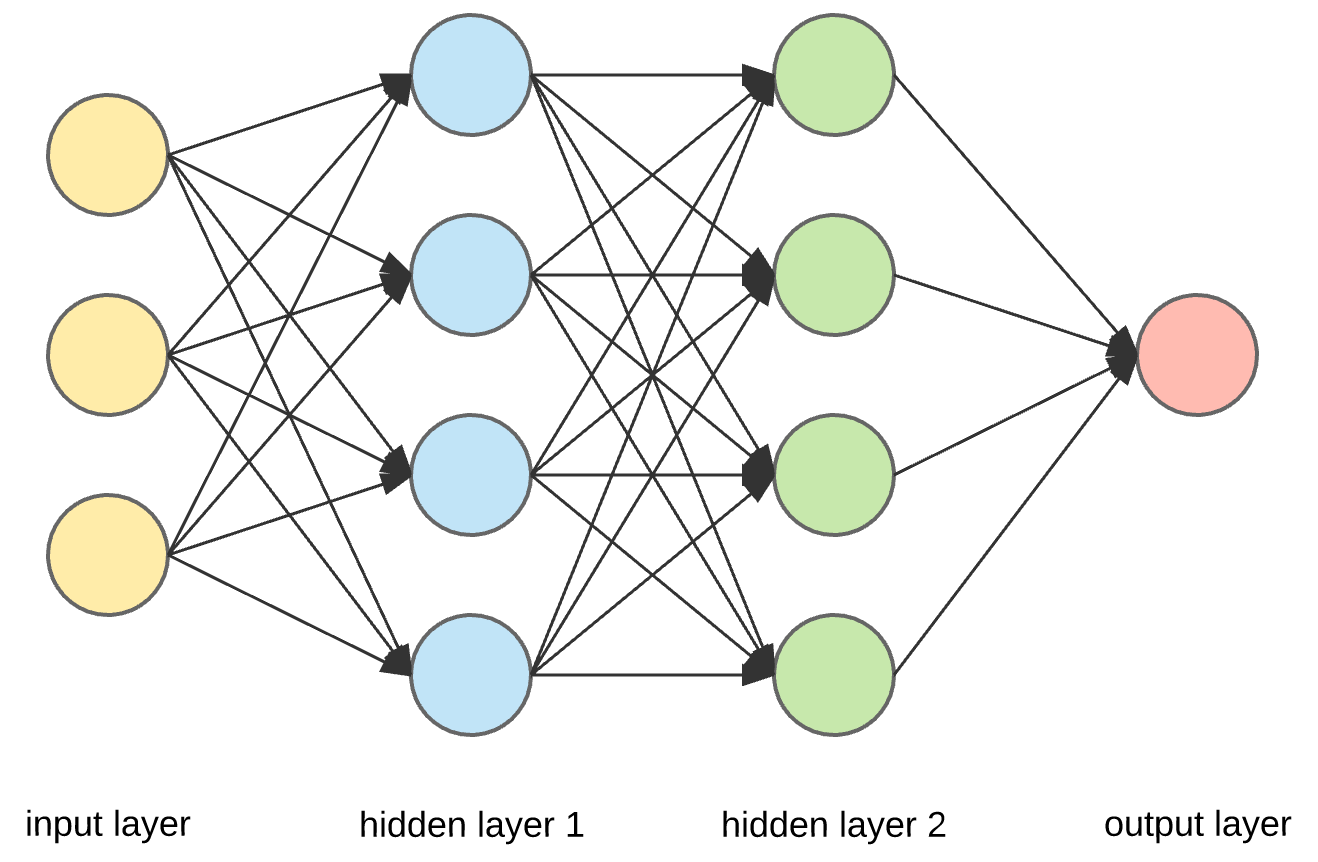

In [95]:
#pip install tensorflow

In [96]:
import tensorflow as tf
from tensorflow import keras # High level API to easily build a model(Deeplearning model),use Keras API tensorflow behind.
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam # Adam optimizer to be use to train the mode
#Dense Network - fully connected neurons
#Activation Functions - Relu, linear, Sigmoid and more 
#Dropout - regularization technique to train ANN  to avoid overfitting the training data(drop some neurons)

2022-10-17 19:37:53.443751: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-17 19:37:53.443785: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### [Back to Top](#TABLE) 

### 9.1 Building the ANN<a name="building_ann"></a>

#### Initializing the ANN

In [97]:
ANN_model = tf.keras.Sequential()#ANN built in sequential fashion

2022-10-17 19:37:59.133448: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-17 19:37:59.133486: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-17 19:37:59.133509: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-10-17 19:37:59.135040: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Adding the input layer, hidden layer and output layer

In [98]:
ANN_model.add(Dense(100, input_dim = 8))#50 connected Neurons and features(independent variable)
#Dense means connection from input to neurons

ANN_model.add(Activation('relu'))
ANN_model.add(Dense(200))

ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(200))

ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(100))

#ANN_model.add(Activation())#output activation is linear cause regression problem w/ 1 neurons
#ANN_model.add(Dense(1))

#for regresion used the default which is no activation function
ANN_model.add(tf.keras.layers.Dense(units=1))

#ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

#for classification activation function is sigmoid or softmax
#sigmoid used for classification 2 category like yes or no
#more than 2 category used softmax activation function
#for regresion used the default which is no activation function
# units is number of neurons
# activation used to break linearity between input and 1st hidden layer
# we can put any units=number of hidden layer neuron, the inputs 4 independent variable is automatically recognize

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               900       
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 activation_2 (Activation)   (None, 200)               0

#### [Back to Top](#TABLE) 

### 9.2 Training the ANN<a name="training_ann"></a>

#### Training and Compiling the ANN

In [99]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

epochs_hist = ANN_model.fit(X_train, y_train, epochs = 200, batch_size = 32, validation_split = 0.2) 
# epochs_hist has all the information about the training
#optimizer where stochastic gradient descend performed. a technique that consist of updating the
#weight of each of the neuron in the hidden layers so as to reduce the loss over the epochs,
#adam optimizer is the best and can be used either on regression and classification
#loss for regression is mean_squared_error
#batch size is not compulsory usually 32 by default

Epoch 1/200
27/27 [==============================] - 2s 14ms/step - loss: 287904896.0000 - val_loss: 315910336.0000
Epoch 2/200
27/27 [==============================] - 0s 6ms/step - loss: 165805280.0000 - val_loss: 155348032.0000
Epoch 3/200
27/27 [==============================] - 0s 8ms/step - loss: 127053416.0000 - val_loss: 153934736.0000
Epoch 4/200
27/27 [==============================] - 0s 10ms/step - loss: 124794440.0000 - val_loss: 154690512.0000
Epoch 5/200
27/27 [==============================] - 0s 12ms/step - loss: 121146936.0000 - val_loss: 151702112.0000
Epoch 6/200
27/27 [==============================] - 0s 9ms/step - loss: 123163320.0000 - val_loss: 150840640.0000
Epoch 7/200
27/27 [==============================] - 0s 7ms/step - loss: 121263040.0000 - val_loss: 159747152.0000
Epoch 8/200
27/27 [==============================] - 0s 8ms/step - loss: 123237144.0000 - val_loss: 151386400.0000
Epoch 9/200
27/27 [==============================] - 0s 7ms/step - loss: 1234

We can see that the loss starting to connverge in the later part like in the epoch 198. 

#### [Back to Top](#TABLE) 

### 9.3 Evaluating the Model Performance<a name="evaluating_ann"></a>

#### Predicting the results of the Test set

In [100]:
#Comparing and putting the predicted output and the actual output to see the difference.
y_pred = ANN_model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1)) #to display vertically from horizontal

9/9 [==============================] - 0s 4ms/step
[[ 3171.35  1633.96]
 [ 9044.15  8547.69]
 [ 9639.    9290.14]
 [22542.14 32548.34]
 [ 9906.58  9644.25]
 [ 2988.91  2680.95]
 [ 2454.15  2198.19]
 [ 1295.12  1241.56]
 [ 3081.78  2710.83]
 [12223.61 12235.84]
 [ 8488.59  8280.62]
 [21472.5  17043.34]
 [13297.98 13974.46]
 [ 8683.79  8219.2 ]
 [ 5413.13  5472.45]
 [ 5896.01  2438.06]
 [ 5644.71  5267.82]
 [ 4650.02  3490.55]
 [ 7311.    6640.54]
 [13820.78 14692.67]
 [ 2216.09  1622.19]
 [12649.95 13224.69]
 [ 2010.5   1256.3 ]
 [ 3664.57  2643.27]
 [ 2785.98  1674.63]
 [ 6479.85  4667.61]
 [ 3555.02  3732.62]
 [11764.69 11552.9 ]
 [ 3916.24  3756.62]
 [32614.74 37465.34]
 [ 8820.93  8059.68]
 [45258.55 47462.89]
 [11131.39 10577.09]
 [ 9879.48 20630.28]
 [18626.8  14571.89]
 [15904.84 36580.28]
 [ 8963.62  8347.16]
 [33569.91 51194.56]
 [ 9790.45  8428.07]
 [ 2854.59  1880.49]
 [29149.59 33475.82]
 [ 3518.57  2867.12]
 [ 5470.85  4564.19]
 [44527.88 47496.5 ]
 [32205.52 36149.48]
 [ 8

In [105]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
r2 = r2_score(y_test,  y_pred).round(3)

print('r2_score:', r2)
print('rmse: {:.3f}'.format(float(np.sqrt(mean_squared_error(y_test, y_pred)))))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test,  y_pred)))
print('explained_variance_score: {:.3f}'.format(explained_variance_score(y_test,  y_pred)))
print('adj_r2: {:.3f}'.format(1-(1-r2)*(n-1)/(n-k-1)))

r2_score: 0.82
rmse: 5497.930
mean_absolute_error: 2959.497
explained_variance_score: 0.830
adj_r2: 0.814


#### After experementing the number of neurons, we are able to come out with the result above with R2=82 % and MAE=2959.497. We all know that R squared closer to 1 implies a better model and less error, the lower the value of MSE the better the model. We can improve more this model but we should also becarefull cause adding additional neurons and increasing the complexity of the model is not necessarily the solution. We can do drop out some neurons and  need to find a good balance between optimizing the network and basically obtaining good and solid results while achieving a model generalization and avoiding overfitting(memorizing the data). 

### [Back to Top](#TABLE)  

## 10. SAGEMAKER AUTOPILOT<a name="Autopilot"></a>

### [Sagemaker AutoPilot(click to view)](https://d-5na4ikhgvf48.studio.us-east-1.sagemaker.aws/jupyter/default/lab?sagemaker-share-id=FaGeqZh93QcNBOcRqQDqXOL-n8pHhenD1b32jijZxck%3D)

#### [Back to Top](#TABLE)  

## 11. CONCLUSION: <a name="CONCLU"></a>

We run the Medical Insurance Data in Local Machine Jupyter, Sagemaker Studio, Studiolab, Deep Learning and in Autopilot then apply Gridsearch, parameter tuning to get the best model and parameters. Results listed below. All are base on The Jupyter Notebook, an open source web application that you can use to create and share documents that contain live code, equations, visualizations, and text. We also used Quicksight, Seaborn and matplotlib to visualize/understand more about our data. We observed below that the AWS Autopilot and Sk-learn has highest R2 and lowest RMSE&MAE. Cross validation was done to check for overfitting. The PCA did not do good in this data because our data is small(only have 8 features) and PCA is to reduce the dimensionality/features of large data. We run PCA and experiment w/ number of component to know how it runs in local machine and in Sagemaker studio. 

### RESULTS:

### 1. SCIKIT-LEARN
    -One of the most widely used machine learning packages on GitHub is Python's scikit-learn. It is a free machine learning library for Python. It supports both supervised and unsupervised machine learning, providing diverse algorithms for classification, regression, clustering, and dimensionality reduction. The library is built using many libraries such as NumPy, SciPy, Pandas, Matplotlib and Seaborn.
#### Best Model After Tuning (XGBoost)
- r2_score: 0.851
- rmse: 5006.263)
- mean_absolute_error: 2824.000
- explained_variance_score: 0.852
- adj_r2: 0.846

### 2. SCIKIT-LEARN(PCA)
     Principal component analysis(PCA) is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.
#### No. of component = 6
- r2_score: 0.676
- rmse: 7386.926
- mean_absolute_error: 4548.069
- explained_variance_score: 0.681
- adj_r2: 0.666

### 3. SAGEMAKER STUDIO
     AWS SageMaker Studio is the first fully integrated development environment (IDE) for machine learning. It provides a single, web-based visual interface where we can perform all ML development steps, improving data science productivity. SageMaker Studio gives us complete access, control, and visibility into each step required to build, analyze, train, test and deploy models.
#### Best Model After Tuning (Built-in XGBoost)
- r2_score: 0.799
- rmse: 5287.310
- explained_variance_score: 0.800
- mean_absolute_error: 3009.889
- adj_r2: 0.786

### 4. SAGEMAKER STUDIO (applying PCA)
#### No. of component = 5
- r2_score: 0.340
- rmse: 9362.264
- mean_absolute_error: 6931.228
- explained_variance_score: 0.342
- adj_r2: 0.314

### 5. AUTOPILOT
    Amazon SageMaker Autopilot helps complete an end-to-end machine learning (ML) workflow by automating the steps of feature engineering, training, tuning, and deploying an ML model for inference. We provide SageMaker Autopilot with a tabular data set and a target attribute to predict. Then, SageMaker Autopilot automatically explores your data, trains, tunes, ranks and finds the best model. Finally, you can deploy this model to production for inference.
#### Best Model(XGBoost)
- r2_score: 0.863
- rmse: 4468.44
- mean_absolute_error: 2431.878
- explained_variance_score: 0.749

### 6. DEEP LEARNING
    Deep learning allows computers to learn independently and undertake tasks with little supervision, promising extraordinary benefits for both science and industry. Unlike traditional machine learning, deep learning attempts to simulate the way our brains learn and process information by creating artificial "neural networks" that can extract complicated concepts and relationships from data. Deep learning models improve through complex pattern recognition in pictures, text, sounds, and other data to produce more accurate insights and predictions.
- r2_score: 0.82
- rmse: 5497.930
- mean_absolute_error: 2959.497
- explained_variance_score: 0.830
- adj_r2: 0.814



    


#### [Back to Top](#TABLE)  